# Leakage in the DFT

The DFT assumes that the signal in time is periodic with period $NT$.  This means the signal has ony frequencies than are also periodic with this same period, $f = n/{NT}$ where $n \in \left\{0, 1, 2, ..., N/2\right\}$ for $n$ even, or $n \in \left\{0, 1, 2, ..., (N-1)/2\right\}$ for $n$ odd.  Usually the song we are digitizing is not really periodic, but we add some zeros on either end of the song and think of it as being periodic when we take the DFT.  What really happens after the song was sung is likely much different.  The exact frequencies in the song are certainly not exactly the discrete frequencies we specified by saying the song was periodic, as there are an infinite number of frequencies in between each harmonic frequency we allowed.  Let's investigate this more with some pyhton.

n is even and is:  [-50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37.
 -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23.
 -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.
   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.]
fftshift of k is :  [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49]


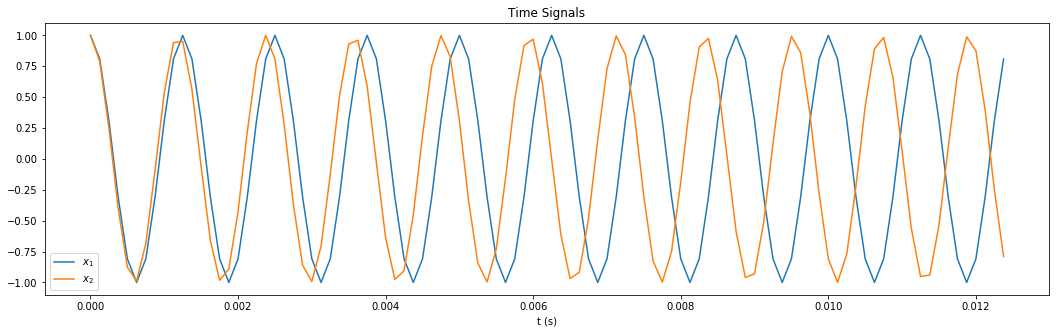

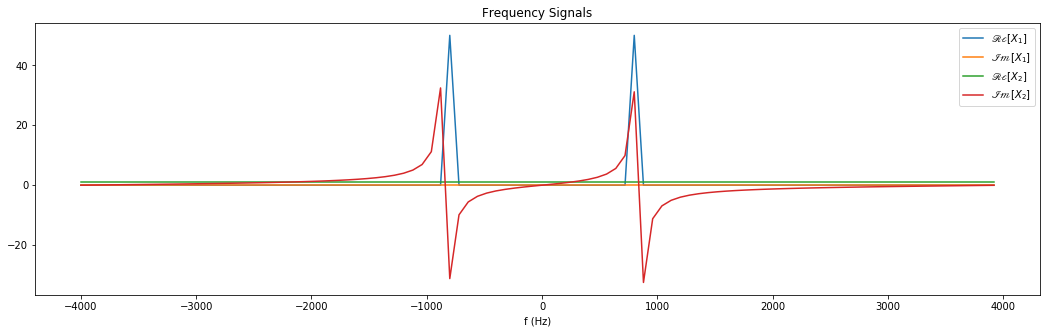

In [32]:
# This demo is to show what happens if we pick a frequency right
# in between two allowed frequencies.
import numpy as np
import matplotlib.pyplot as plt

T = 1/8000
N = 100
T_0 = N*T
n_h = 10

k = np.arange(0, N)
t = k*T
if N % 2 == 0: # N is even
    n = np.arange(-N/2, N/2)
    print('n is even and is: ', n)
else:
    n = np.arange(-np.int(N/2), np.int(N/2)+1)
    print('n is odd and is : ', n)
print('fftshift of k is : ', np.fft.fftshift(k))
f = n/T_0
x1 = np.cos(2*np.pi*n_h*t/T_0)
X1 = np.fft.fftshift(np.fft.fft(x1))
x2 = np.cos(2*np.pi*(n_h+0.5)*t/T_0)  # This is the worst case, smack in the middle of harmonic frequencies.
X2 = np.fft.fftshift(np.fft.fft(x2))
plt.rcParams['figure.figsize'] = [18, 5]
plt.plot(t, x1, t, x2)
plt.title('Time Signals')
plt.xlabel('t (s)')
plt.legend(['$x_1$', '$x_2$'])
plt.show()
plt.plot(f, np.real(X1), f, np.imag(X1), f, np.real(X2), f, np.imag(X2))
plt.title('Frequency Signals')
plt.xlabel('f (Hz)')
plt.legend(['$\mathscr {Re}[X_1]$','$\mathscr {Im}[X_1]$',
            '$\mathscr {Re}[X_2]$','$\mathscr {Im}[X_2]$'])
plt.show()

Since the FFT assumes that the signal, $x(t)$ is periodic, there must be high frequency components due to the jump at the end of the sequence of data to go back to the beginning.  This causes the high frequencies you see in $X_2(f)$ above, as compared to $X_1(f)$ whose frequency was the $n_h$th harmonic.  Note that the original wave was a cosine, but the FFT interprets it as a superposition of sine waves.  Note that if $x(t) = x(t+T_0)$, the time wave really is odd, not even.  These sine waves would go through the sample points over the interval we sampled, but the actual time values between samples would be different than if $x_2(t) = cos(2\pi (n_h + 0.5)t/T_0)$ as the python equation suggests.

1.  What is the odd periodic wave in time does the FFT say is there?

The sharp discontinuity at the ends of the sinewave will have frequency components that extend to infinity, and they will cause aliasing distortion.  If the waveform we were sampling truely was $x(t) = cos(2\pi (n_h + 0.5)t/T_0)$, and we wanted a better idea about it, it seems like it would be good to artificially make it fade in at the beginning of our sampling interval, $T_0$, and fade out towards the end of our sampling interval.  To accomplish this we use window functions, like the Hann (or Hanning) window: $$w(t) = \frac{ 1 - cos(2\pi t/T_0)}{2} = sin^2(\pi t/T_0)$$

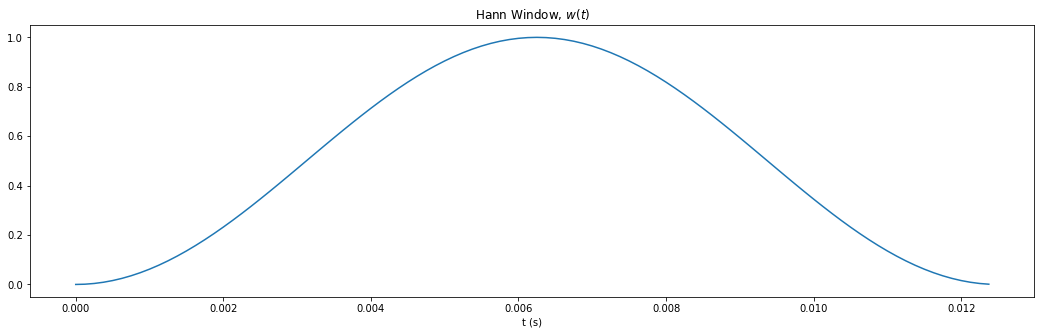

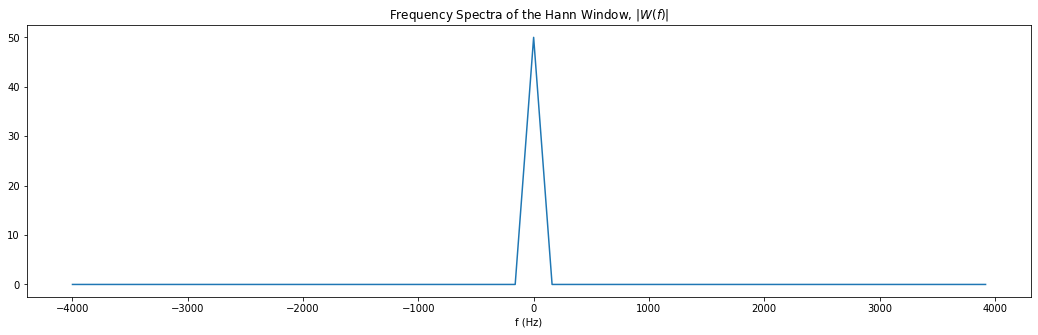

In [34]:
w = (np.sin(np.pi*t/T_0)**2)
plt.plot(t, w)
plt.title('Hann Window, $w(t)$')
plt.xlabel('t (s)')
plt.show()
W = np.fft.fftshift(np.fft.fft(w))
plt.plot(f, np.abs(W))
plt.title('Frequency Spectra of the Hann Window, $|W(f)|$')
plt.xlabel('f (Hz)')
plt.show()

Note, the Hann window's spectrum is narrow, and this is wanted.  There are plenty of other windows people use.  This is the simplist one I know of that does basically what we want.  Let's see what happens when we apply it to the signals, $x_1(t)$ and $x_2(t)$.

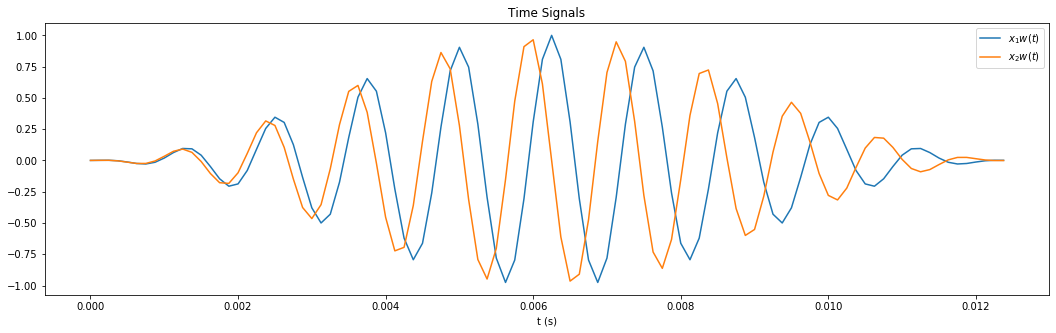

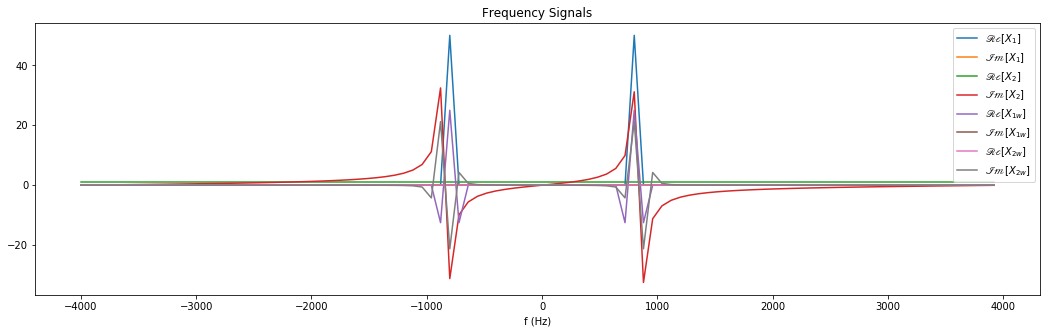

In [35]:
x1_w = x1*w
x2_w = x2*w
X1_w = np.fft.fftshift(np.fft.fft(x1_w))
X2_w = np.fft.fftshift(np.fft.fft(x2_w))
plt.plot(t, x1_w, t, x2_w)
plt.title('Time Signals')
plt.xlabel('t (s)')
plt.legend(['$x_1 w(t)$', '$x_2 w(t)$'])
plt.show()
plt.plot(f, np.real(X1), f, np.imag(X1), f, np.real(X2), f, np.imag(X2),
        f, np.real(X1_w), f, np.imag(X1_w), f, np.real(X2_w), f, np.imag(X2_w))
plt.title('Frequency Signals')
plt.xlabel('f (Hz)')
plt.legend(['$\mathscr {Re}[X_1]$','$\mathscr {Im}[X_1]$',
            '$\mathscr {Re}[X_2]$','$\mathscr {Im}[X_2]$',
            '$\mathscr {Re}[X_{1w}]$','$\mathscr {Im}[X_{1w}]$',
            '$\mathscr {Re}[X_{2w}]$','$\mathscr {Im}[X_{2w}]$'])
plt.show()

Note how the windowed data is much better for the badly non-harmonic cosine wave, and not much worse for the perfectly harmonic cosine wave.  By playing with the N in the first cell, and running all cells, it is evident that increasing the number of samples, $N$ doesn't change the leakage. 